# Create a crowd of pedestrians from the ANSURII dataset
Visit the [database website](https://ph.health.mil/topics/workplacehealth/ergo/Pages/Anthropometric-Database.aspx)

The created crowd is made of agents drawn uniformly from the ANSURII dataset. 

## With default parameters

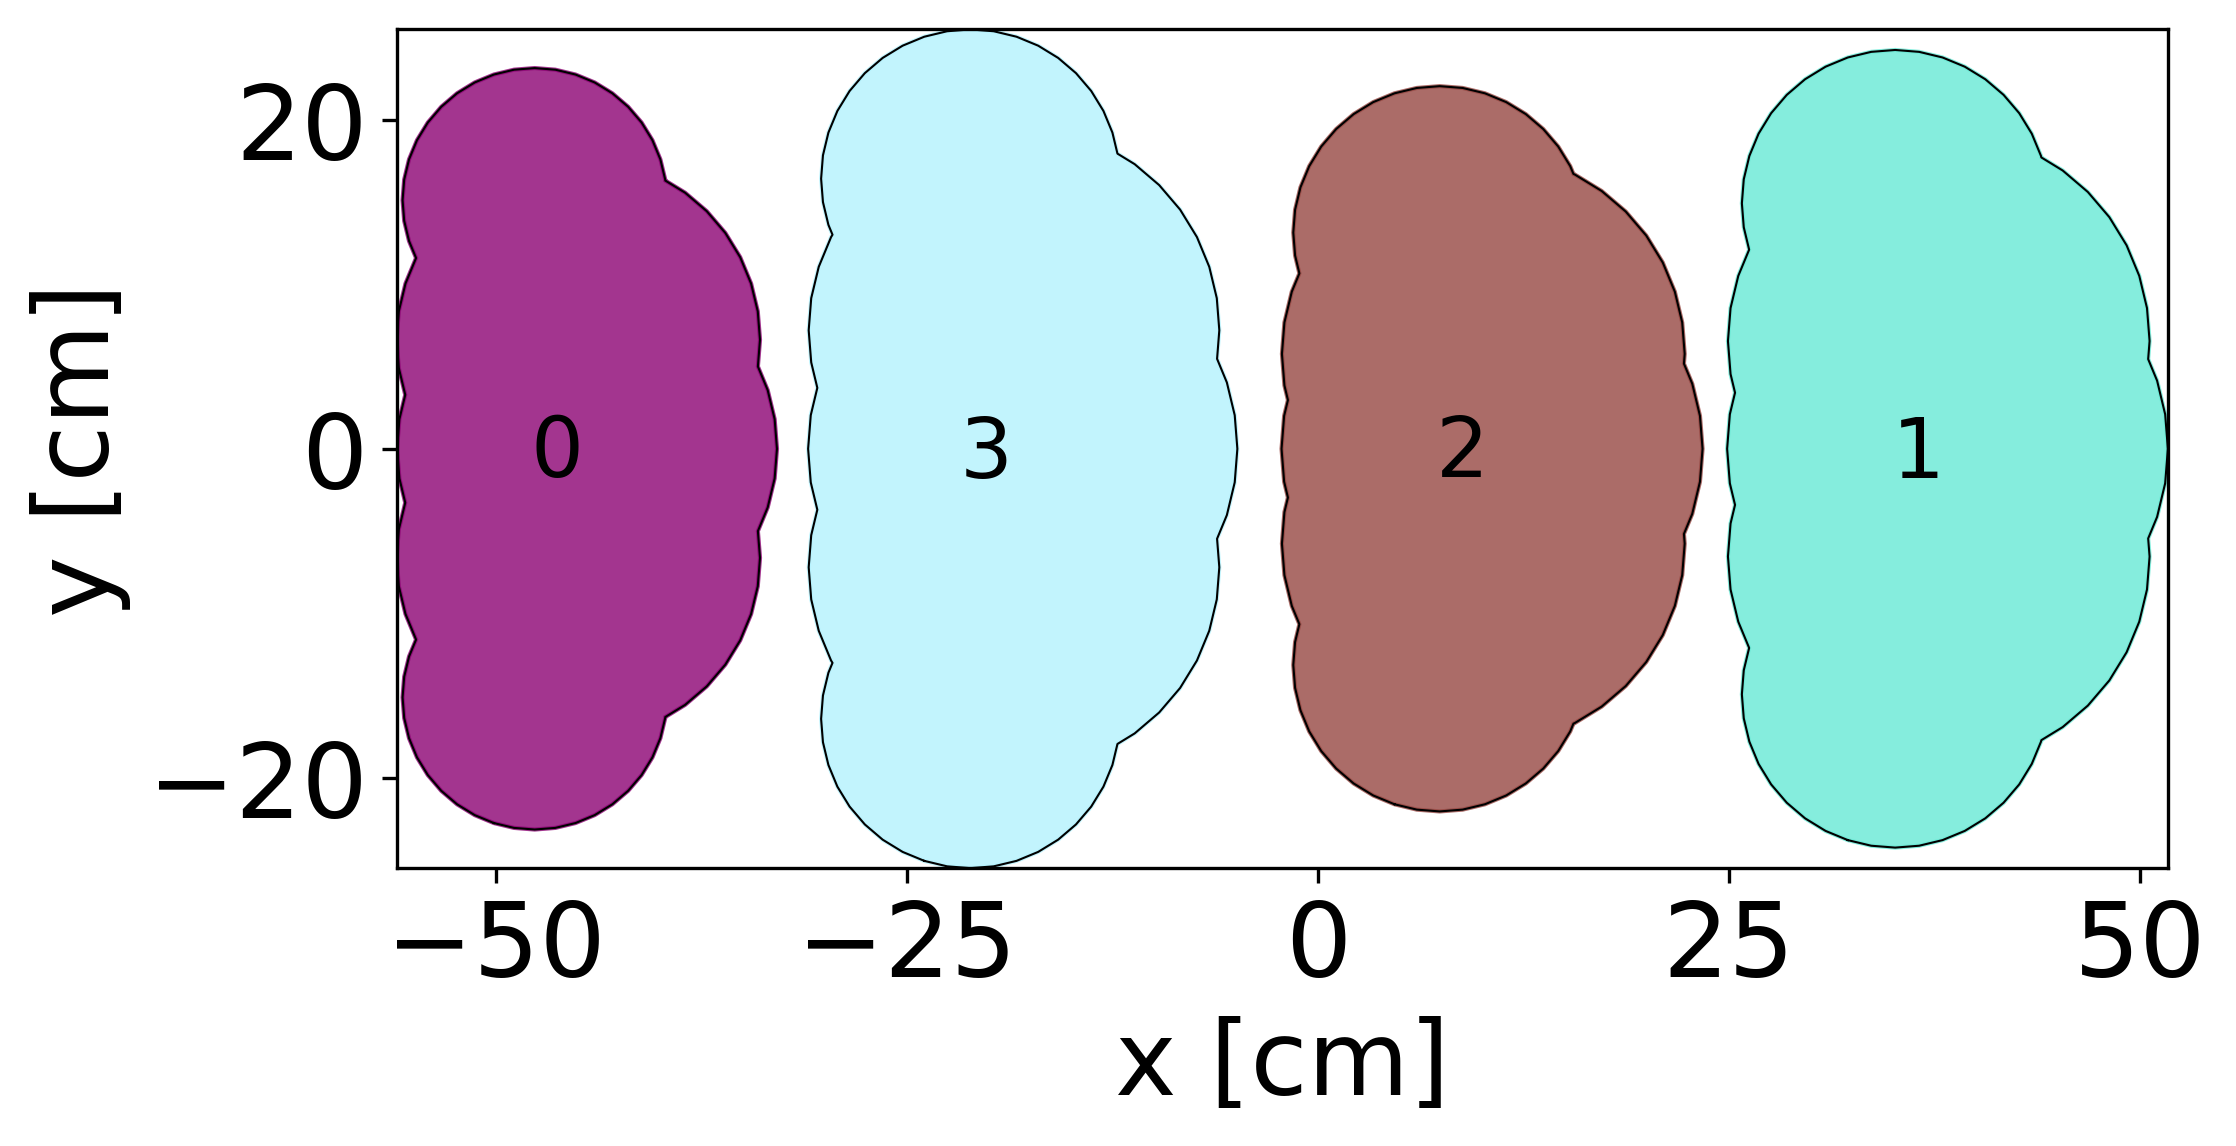

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from configuration.models.crowd import Crowd
import configuration.backup.crowd_to_zip_and_reverse as fun_zip
from streamlit_app.plot import plot

# Initialize the crowd with default parameters
crowd = Crowd()
crowd.create_agents()
crowd.pack_agents_with_forces()

# Visualize the crowd
fig = plot.display_crowd2D(crowd)
plt.show()

# Download the xml configuration files necessary for the simulation to a zip format
output_zip_path = Path.cwd().parent.parent.parent / "data" / "xml" / "crowd_ANSURII.zip"
fun_zip.save_crowd_data_to_zip(crowd, output_zip_path)

## Changing default parameters

We invite you to play with these parameters and see by yourself the effect on the overall crowd.

In [2]:
from shapely.geometry import Polygon

boundaries = Polygon([(-150.0, -100.0), (150.0, -100.0), (150.0, 100.0), (-150.0, 100.0)])  # (cm)
NUMBER_AGENTS: int = 20
REPULSION_LENGTH: float = 5.0  # (cm)
DESIRED_DIRECTION: float = 90.0  # (degrees)

### With random packing

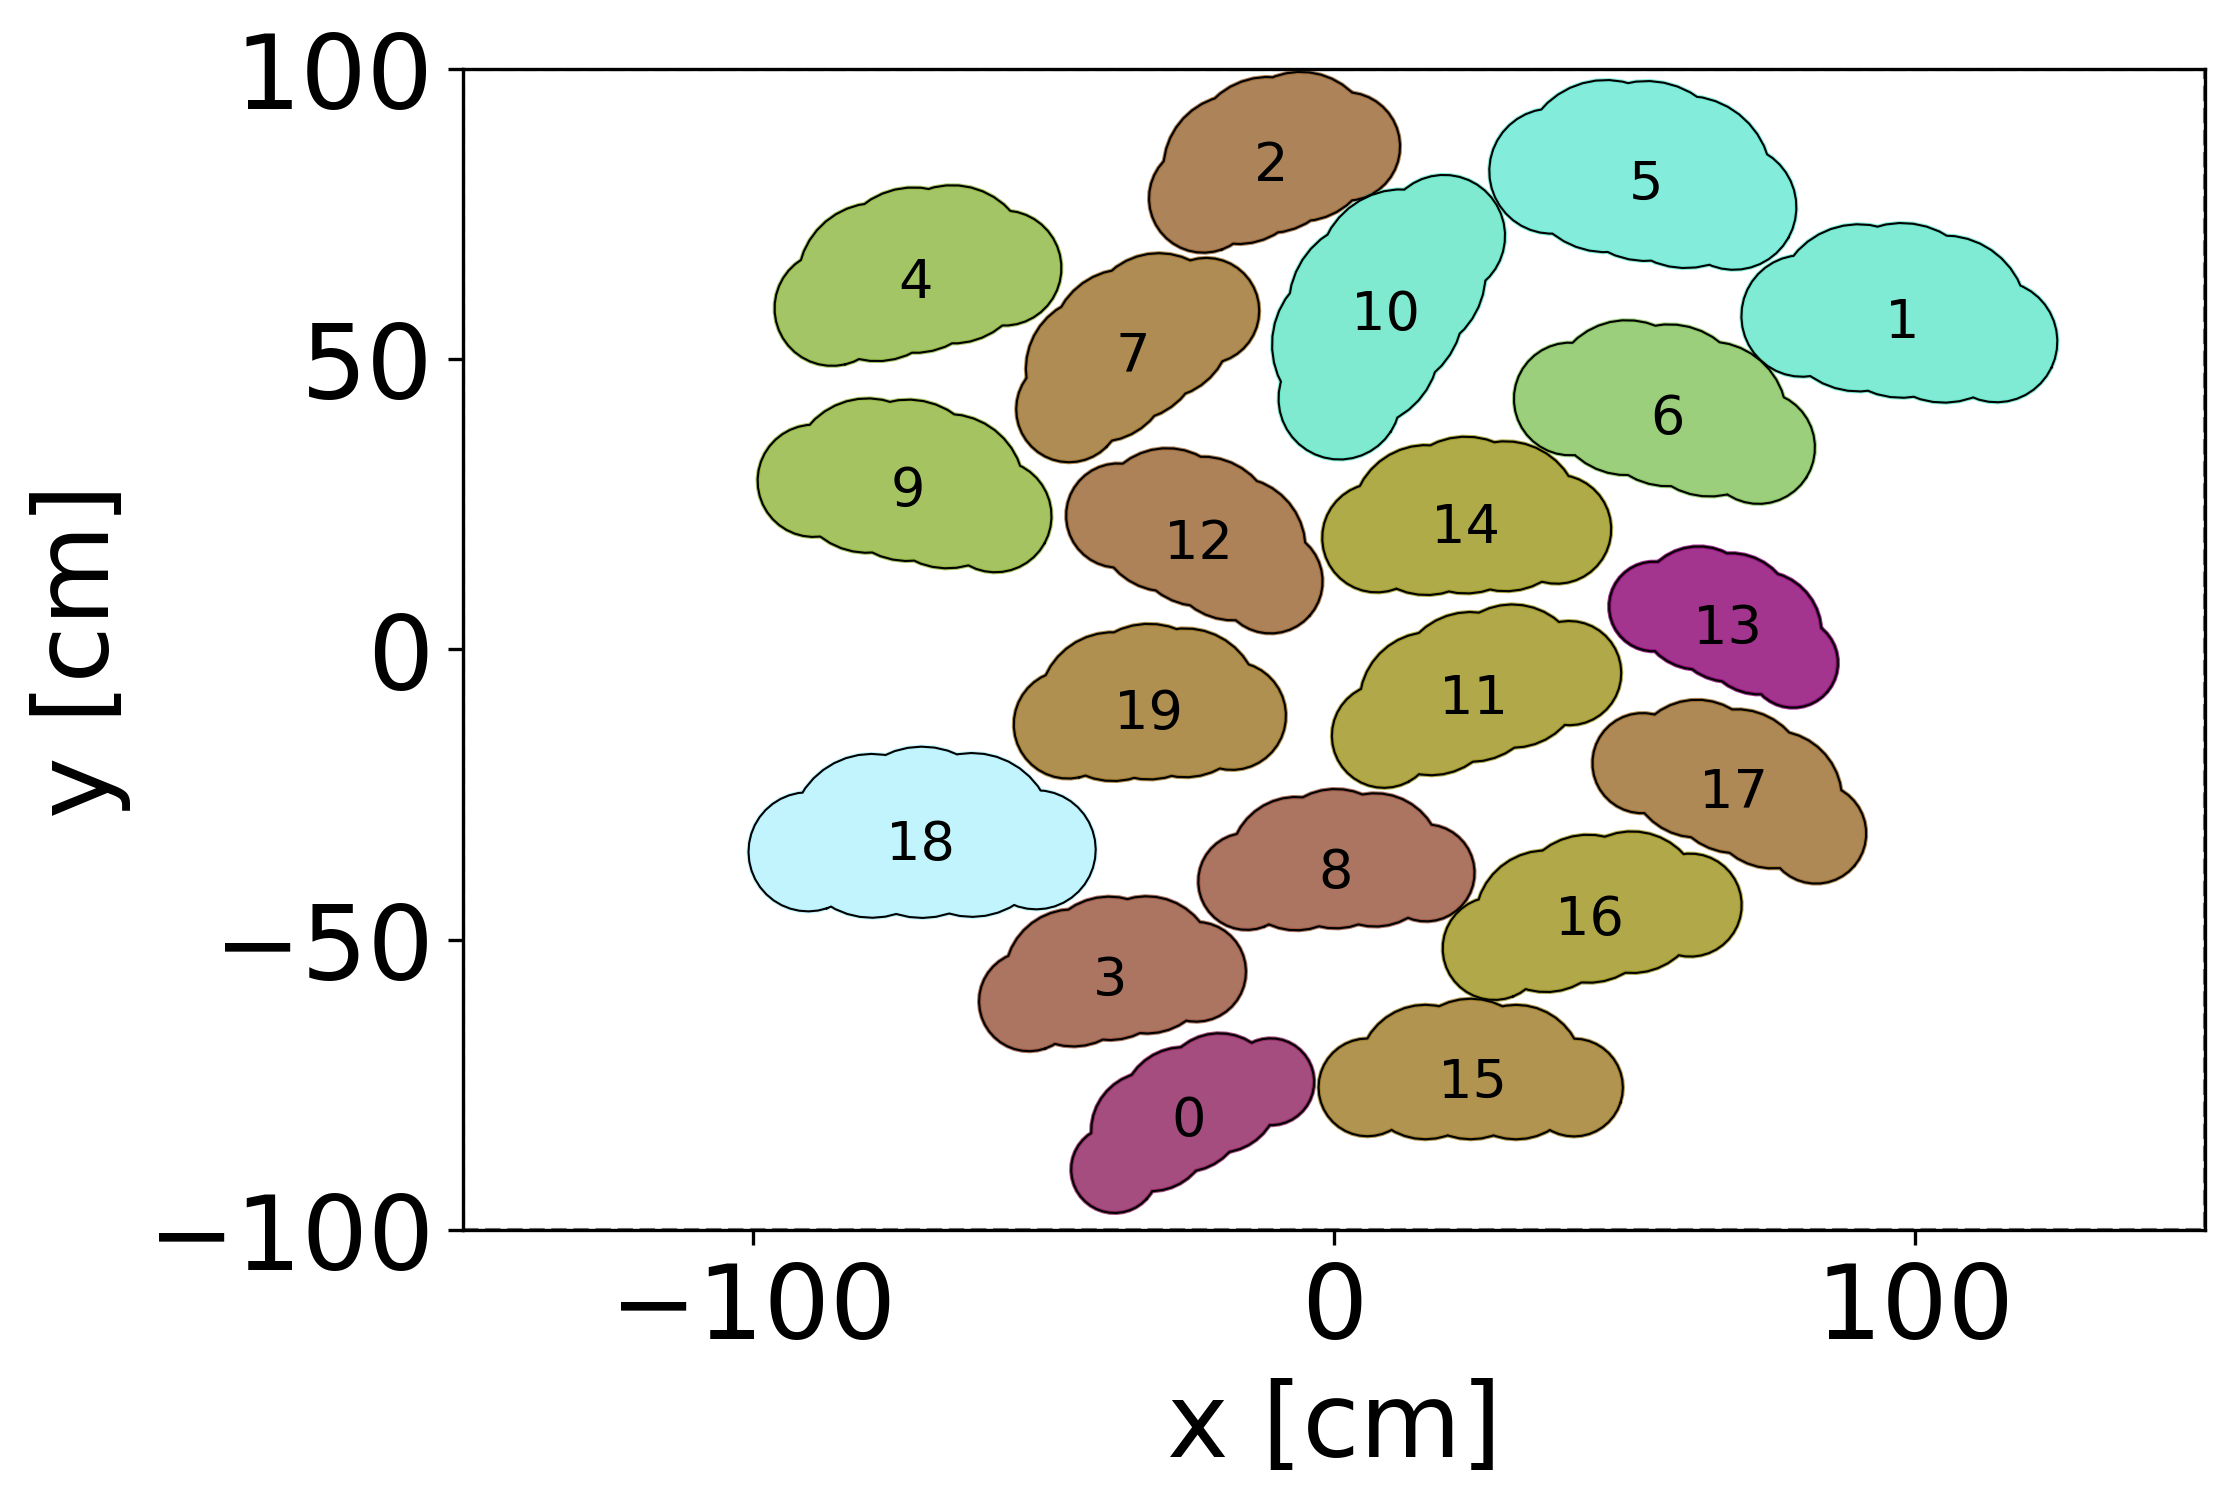

In [3]:
# Parameters
RANDOM_PACKING: bool = True
boundaries = Polygon([(-150.0, -100.0), (150.0, -100.0), (150.0, 100.0), (-150.0, 100.0)])  # (cm)

# Create a new crowd with specified parameters
crowd = Crowd(boundaries=boundaries)
crowd.create_agents(number_agents=NUMBER_AGENTS)
crowd.pack_agents_with_forces(repulsion_length=REPULSION_LENGTH, desired_direction=DESIRED_DIRECTION, random_packing=RANDOM_PACKING)

# Visualize results
fig = plot.display_crowd2D(crowd)
plt.show()

### Without random packing

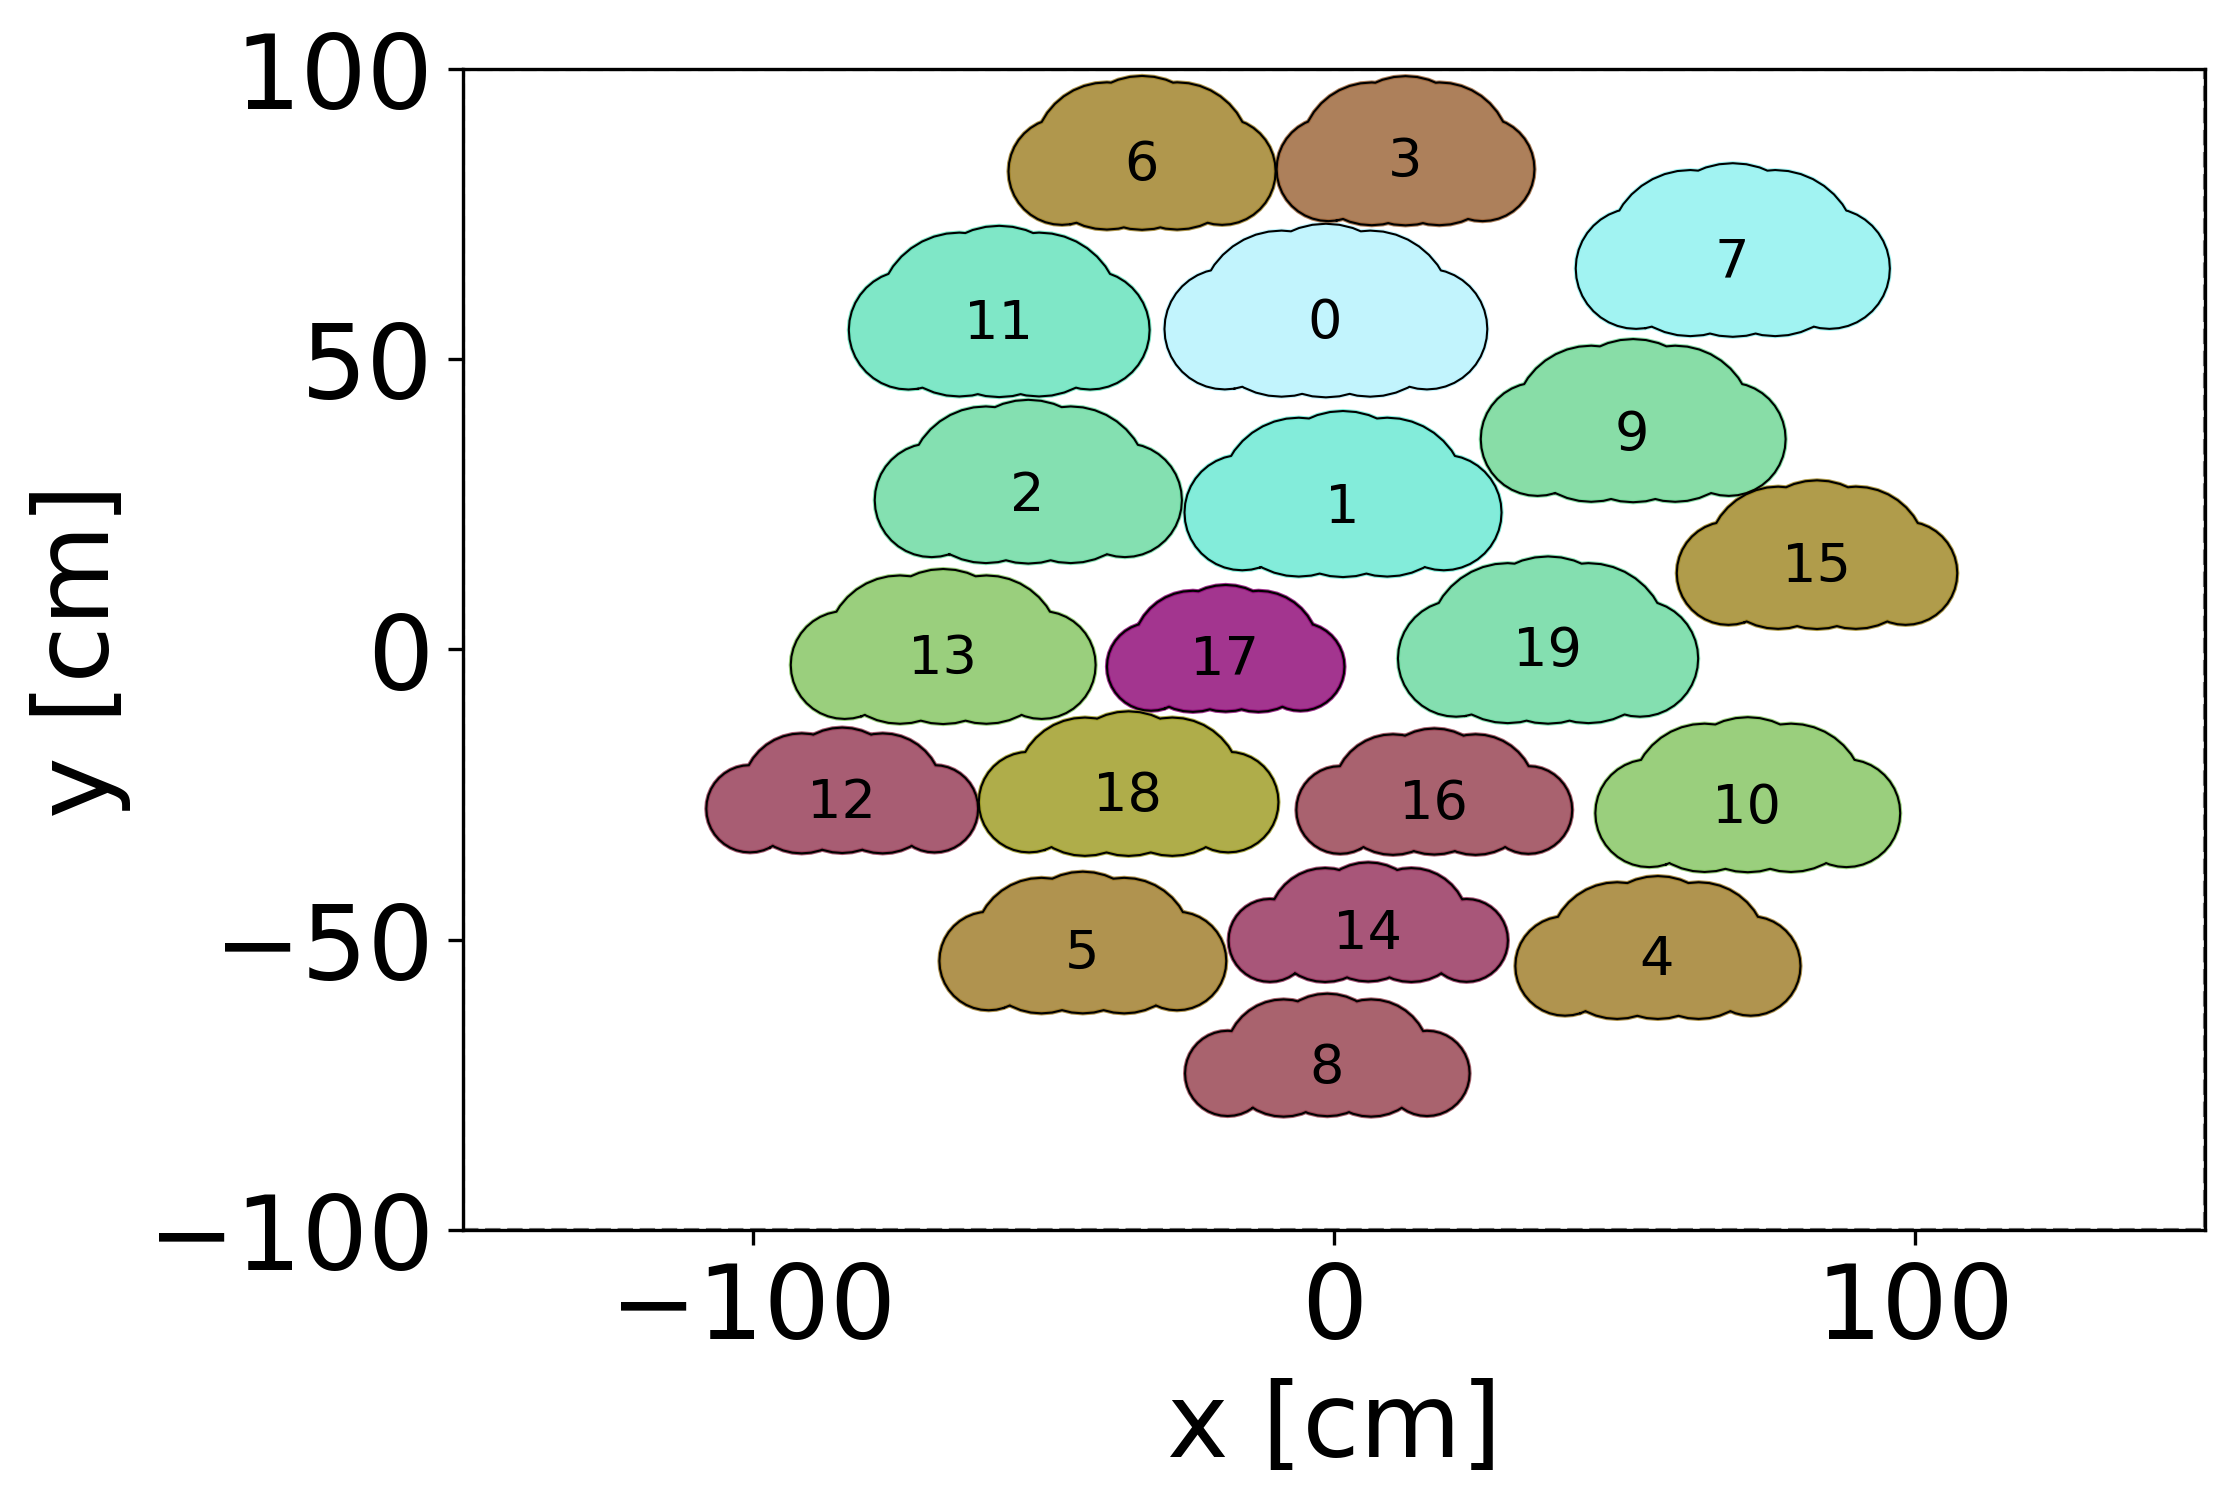

In [4]:
# Constant
RANDOM_PACKING: bool = False

# Create a new crowd with the same boundaries
crowd = Crowd(boundaries=boundaries)
crowd.create_agents(number_agents=NUMBER_AGENTS)
crowd.pack_agents_with_forces(repulsion_length=REPULSION_LENGTH, desired_direction=DESIRED_DIRECTION, random_packing=RANDOM_PACKING)

# Visualize results
fig = plot.display_crowd2D(crowd)
plt.show()

### With more space around each agent

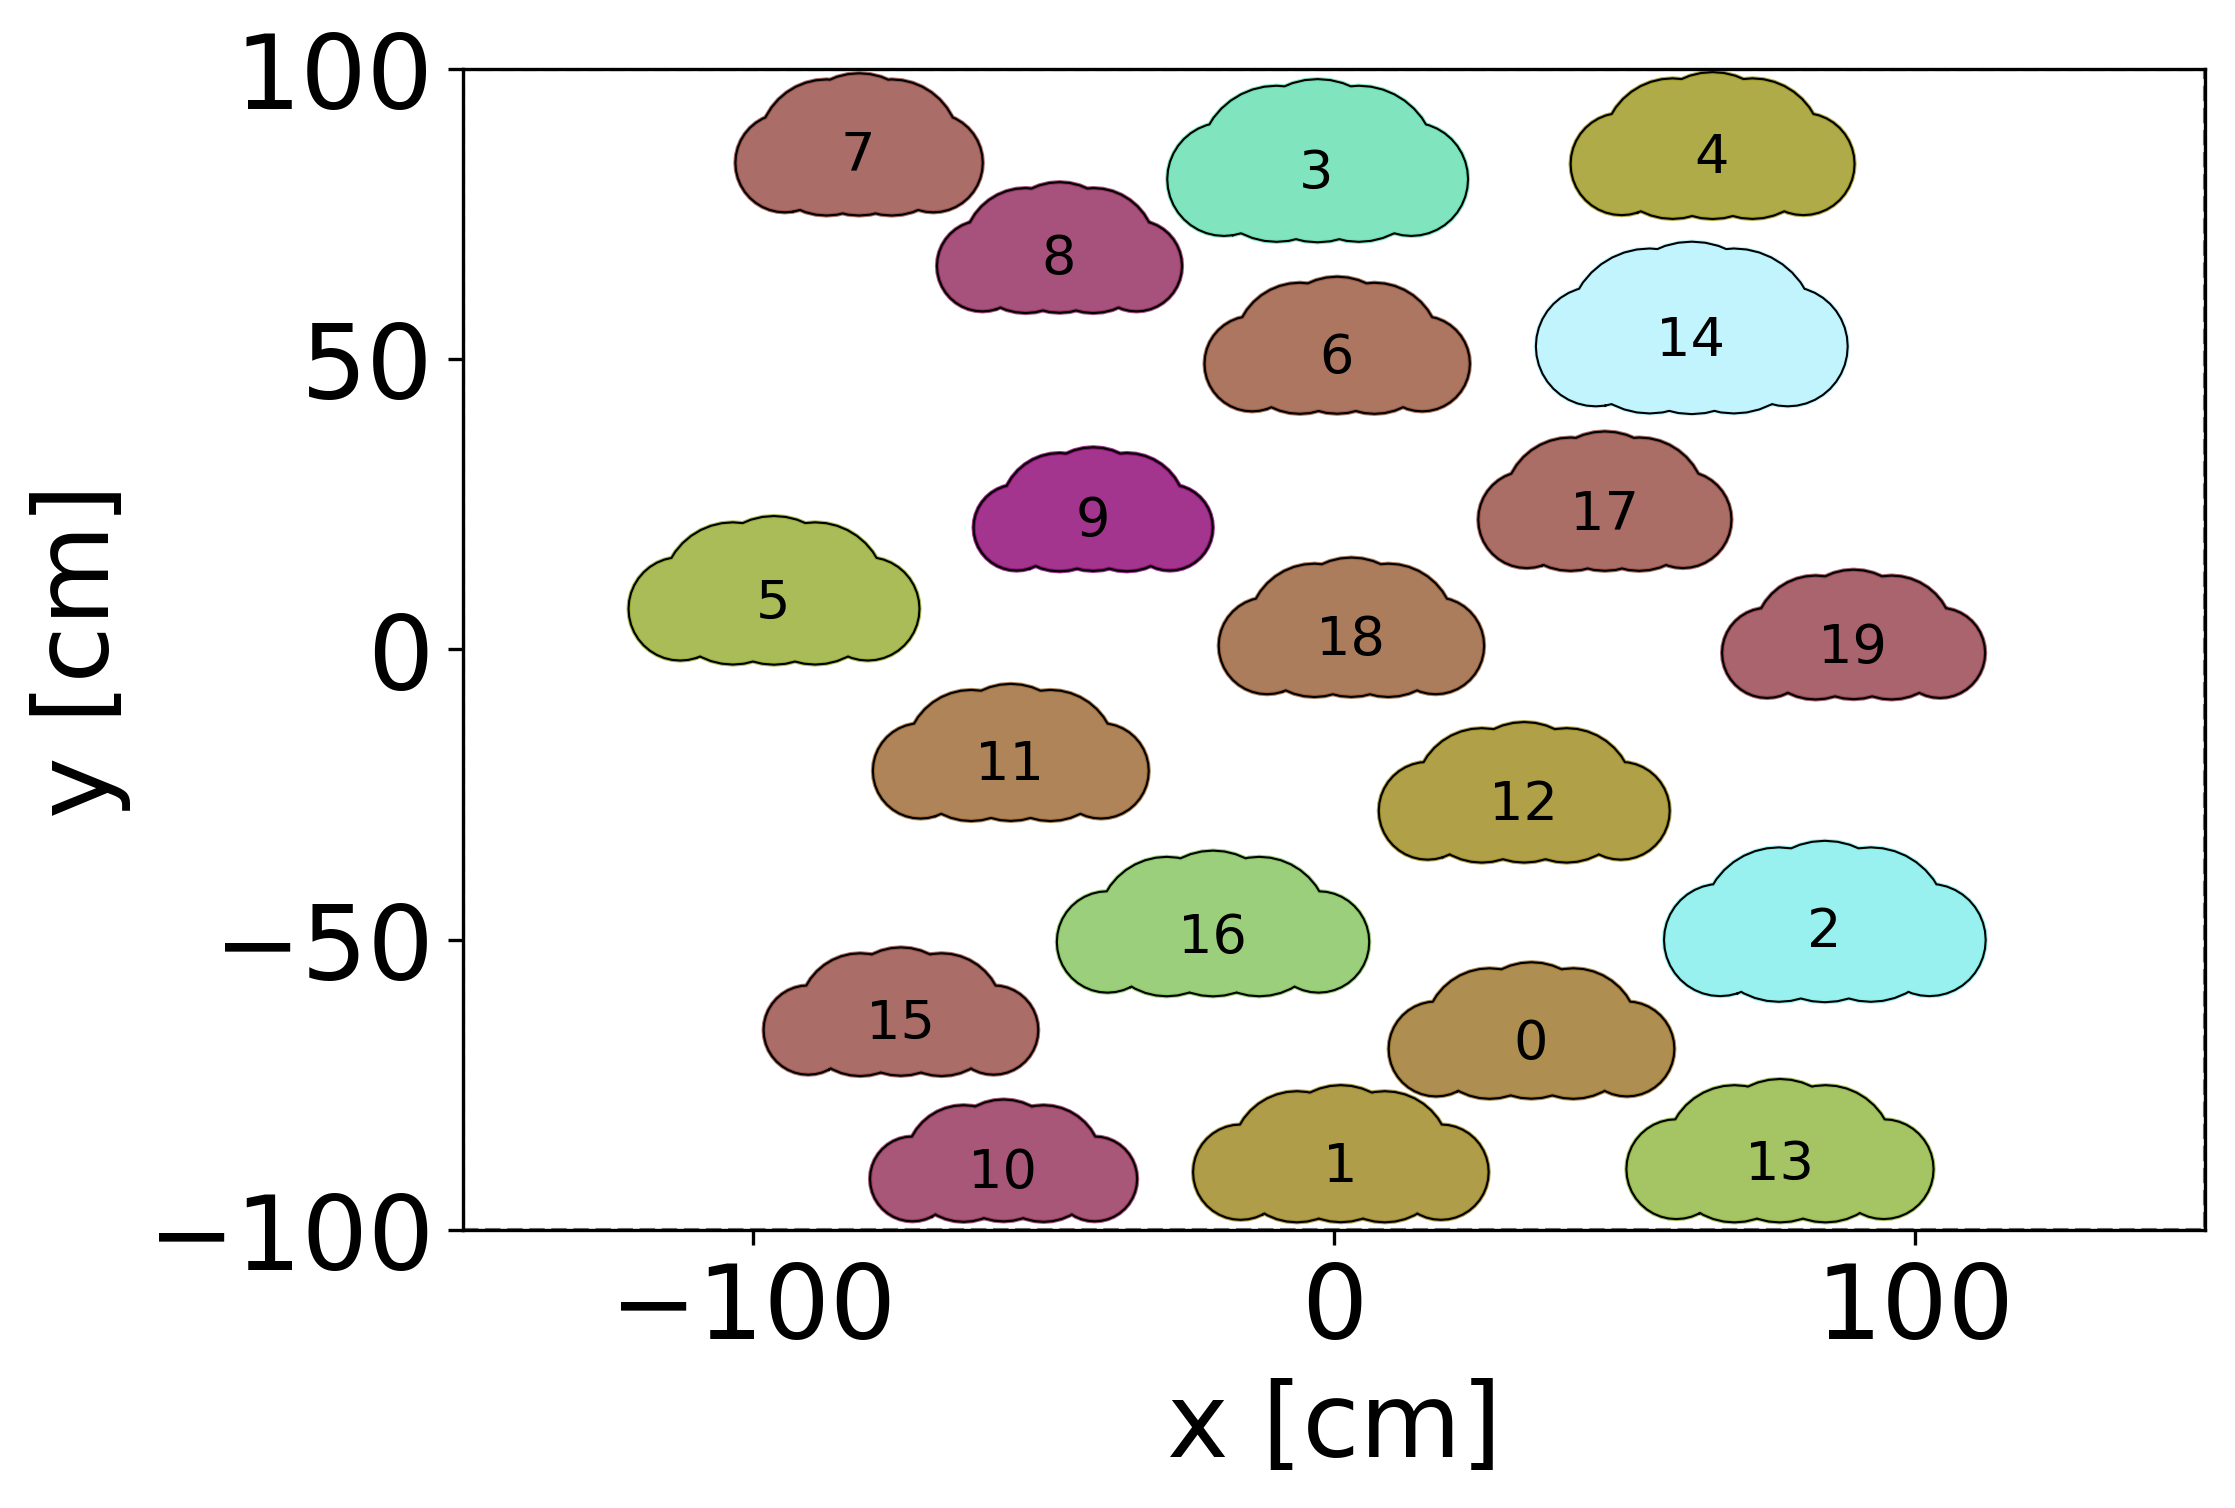

In [5]:
# Parameter
REPULSION_LENGTH: float = 25.0  # (cm)

# Create a new crowd with the same boundaries
crowd = Crowd(boundaries=boundaries)
crowd.create_agents(number_agents=NUMBER_AGENTS)
crowd.pack_agents_with_forces(repulsion_length=REPULSION_LENGTH, desired_direction=DESIRED_DIRECTION, random_packing=RANDOM_PACKING)

# Visualize the crowd
fig = plot.display_crowd2D(crowd)
plt.show()

## In 3D

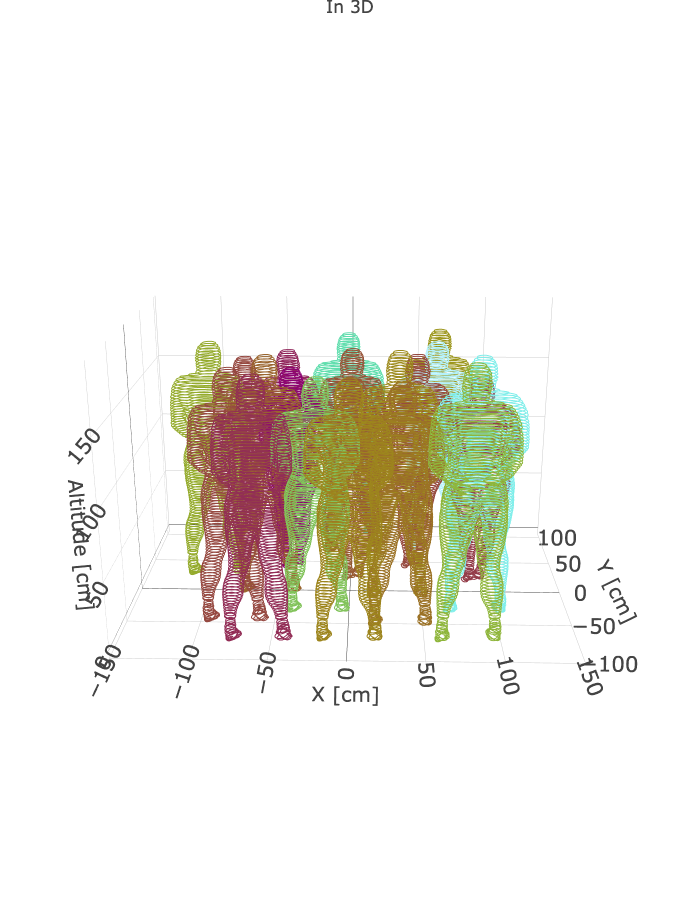

In [6]:
import plotly.graph_objects as go
from IPython.display import Image
from pathlib import Path

# Create a 3D plot of the crowd
fig_plotly: go.Figure = plot.display_crowd3D_whole_3Dscene(crowd)

# Display the generated Plotly figure in the documentation
path_data = Path.cwd().parent.parent / "data"
fig_plotly.write_image(path_data / "images" / "generated" / "crowd3D.png", format="png")
Image(path_data / "images" / "generated" / "crowd3D.png")

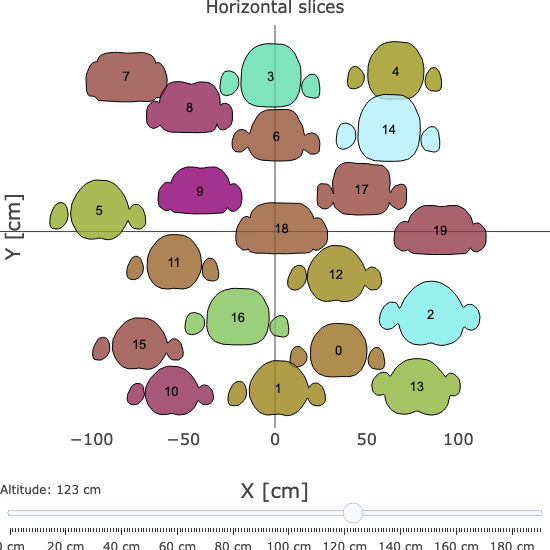

In [7]:
# Create a 3D plot of the crowd with horizontal slices
fig_plotly: go.Figure = plot.display_crowd3D_slices_by_slices(crowd)

# Display the generated Plotly figure in the documentation
path_data = Path.cwd().parent.parent / "data"
fig_plotly.write_image(path_data / "images" / "generated" / "crowd3D_horizontal_slices.png", format="png")
Image(path_data / "images" / "generated" / "crowd3D_horizontal_slices.png")